<a href="https://colab.research.google.com/github/samratchakraborty422000/APPLES-STOCK-EDA/blob/main/APPLE_STOCKS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
import scipy

warnings.filterwarnings("ignore")
''' Warnings are provided to warn the developer of situations that aren’t necessarily exceptions.
 Usually, a warning occurs when there is some obsolete of certain programming elements, such as keyword, function or class, etc.'''

%matplotlib inline
# Matplotlib Inline command is a magic command that makes the plots generated by matplotlib show into
#the IPython shell that we are running and not in a separate output window.

# IMPORTING AND READING THE DATASET


In [79]:
df=pd.read_csv("/content/AAPL.csv")

# QUICK OVERVIEW OF THE DATASET

In [80]:
df.head(10) #top rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400


In [81]:
df.shape #dimension of the dataset

(10468, 7)

# CHECKING DATATYPES OF THE COLUMNS

In [82]:
df.info() #showing information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


* PARTITIONING NUMERICAL AND CATEGOCIAL COLUMNS 

In [83]:
numerical_columns=[column for column in df.columns if df[column].dtype != 'object']
categorical_columns=[column for column in df.columns if df[column].dtype == 'object']

#printing the columns

print('{} column(s) is/are numerical columns, and these columns are: {}'.format(len(numerical_columns),numerical_columns))
print('{} column(s) is/are categorical columns, and these columns are: {}'.format(len(categorical_columns),categorical_columns))


6 column(s) is/are numerical columns, and these columns are: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
1 column(s) is/are categorical columns, and these columns are: ['Date']


# DATA CLEANING

* CHECKING FOR NULL VALUES

In [84]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

there are no null values

* CHANGING DATATYPES

In [85]:
# CHANGING THE DATATYPE OF DATE COLUMN FROM OBJECT TO DATE-TIME
df['Date']=pd.to_datetime(df['Date'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [87]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400


# DATA VISUALIZATION

* HERE WE ARE VISUALIZING HOW EACH STOCK'S ATTRIBUTES ARE CHANGING OVER THE YEARS 

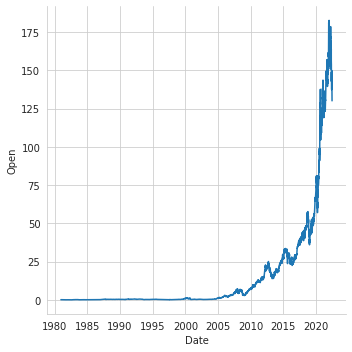

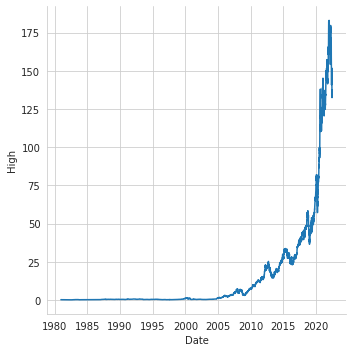

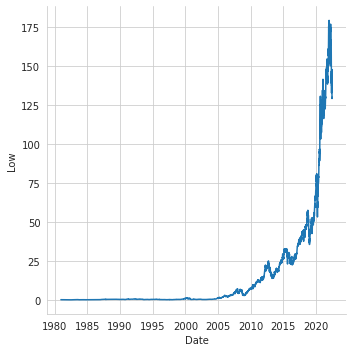

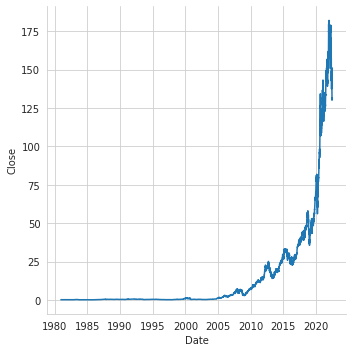

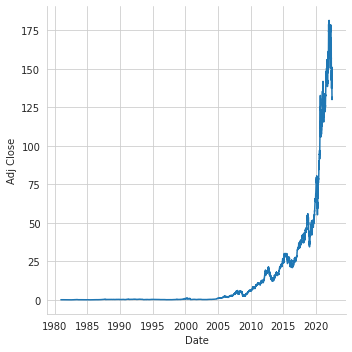

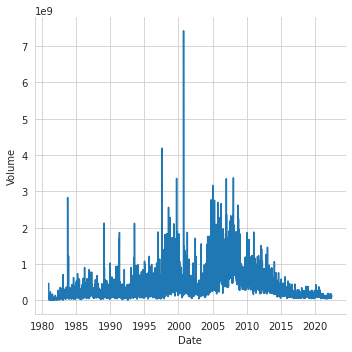

In [88]:
for i in df.columns:
    if i !='Date':
       sns.relplot(data=df, x="Date", y=i, kind="line")

* CORRELATION MATRIX

Text(33.0, 0.5, 'stock Features')

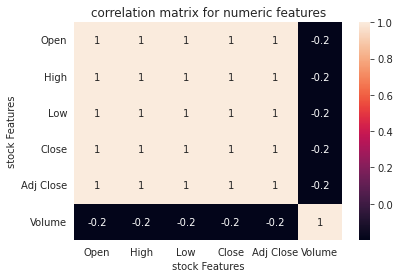

In [89]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title("correlation matrix for numeric features")
plt.xlabel("stock Features")
plt.ylabel("stock Features")

From the above heatmap, you can see a large number of 1s and values close to 1. This means those variables show high positive correlations and are interrelated. This might be possible because of the comparatively very small difference between those values. However, in-stock market this small value is what makes the difference. So, what we are going to do, is add new variables to our dataset that represents the difference between those values.

In [105]:
df['open-high'] = df['Open']-df['High']
df['open-low'] = df['Open'] - df['Low']
df['close-high'] = df['Close']-df['High']
df['close-low'] = df['Close'] - df['Low']
df['high-low'] = df['High'] - df['Low']
df['open-close'] = df['Open'] - df['Close']
#we also creat a year column
df['Year'] = df['Date'].apply(lambda x: x.strftime('%Y')) 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,open-high,open-low,close-high,close-low,high-low,open-close,Year
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,-0.000558,0.000000,-0.000558,0.0,0.000558,0.000000,1980
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,0.000000,0.000558,-0.000558,0.0,0.000558,0.000558,1980
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,0.000000,0.000558,-0.000558,0.0,0.000558,0.000558,1980
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,-0.000558,0.000000,-0.000558,0.0,0.000558,0.000000,1980
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,-0.000558,0.000000,-0.000558,0.0,0.000558,0.000000,1980


We have added 6 new entries to our dataset. We can now create a heatmap with these new values and see their inter-correlation.

From the previous heatmap, we could realize that those values aren’t very useful. So for more clarity, we will drop those values and take only the new values for creating the heatmap.


<AxesSubplot:>

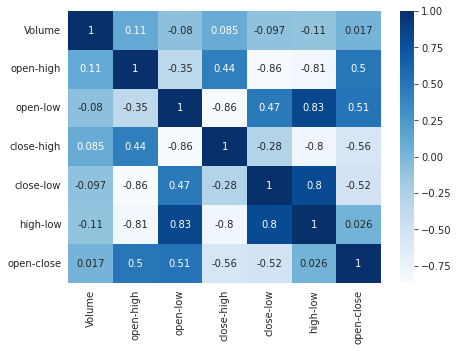

In [91]:
df2 = df.copy()
df2 = df2.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(df2.corr(),cmap='Blues',annot=True)

Now this looks more informative.

Text(0.5, 1.0, 'YEARWISE VOLUME OF STOCKS')

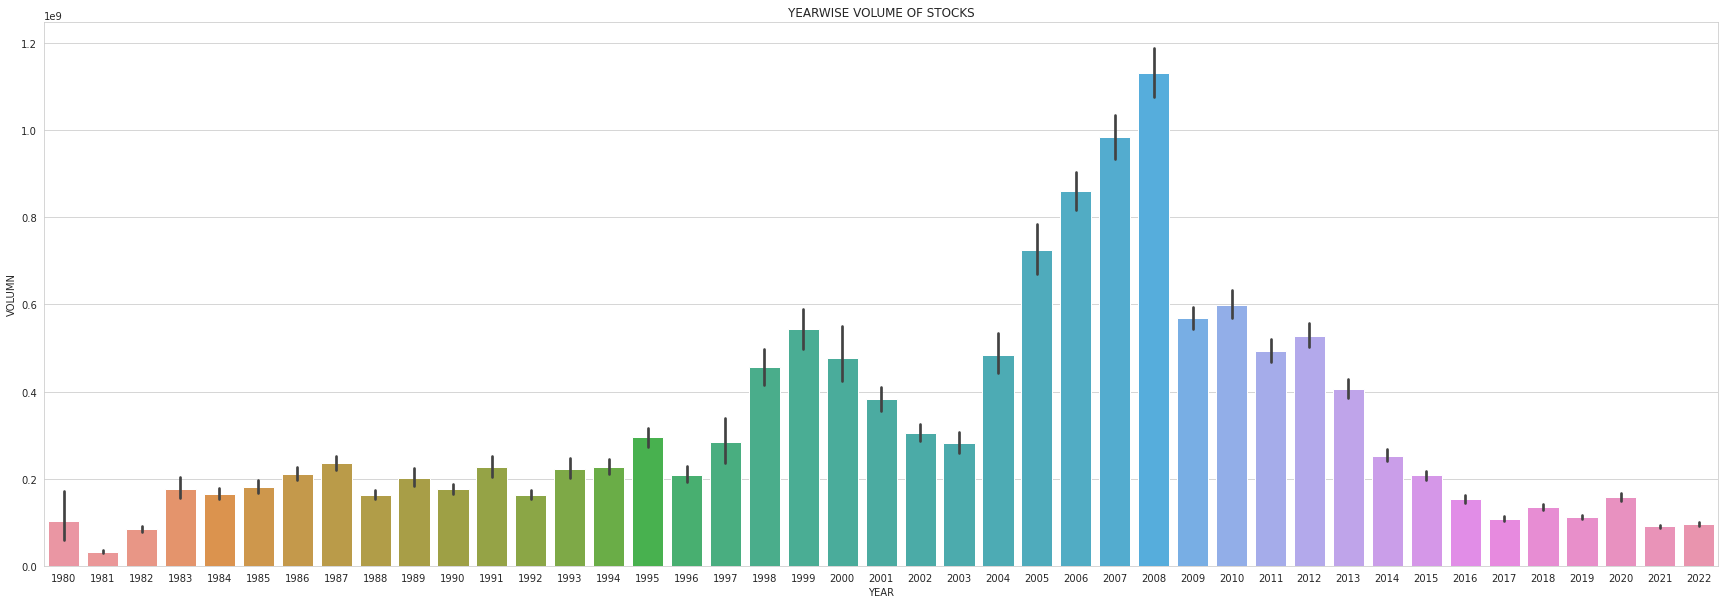

In [92]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(data=df, x="Year", y="Volume",ax=ax)
plt.xlabel('YEAR')
plt.ylabel('VOLUMN')
plt.title('YEARWISE VOLUME OF STOCKS')

# INSIGHTS USING GROUP BY

* HIGHEST VALUES

In [130]:
df.groupby('Year')['Volume','Open','High','Low','Close','Adj Close'].max().reset_index()

,Year,Volume,Open,High,Low,Close,Adj Close
0,1980,469033600,0.160714,0.161272,0.160714,0.160714,0.125441
1,1981,231302400,0.154018,0.155134,0.154018,0.154018,0.120214
2,1982,357078400,0.151228,0.155692,0.147321,0.151228,0.118037
3,1983,2832345600,0.280134,0.282366,0.273996,0.280134,0.218651
4,1984,626796800,0.148438,0.153460,0.145089,0.148438,0.115859
5,1985,733980800,0.136719,0.138951,0.136719,0.136719,0.106712
6,1986,904131200,0.194754,0.195871,0.190290,0.195313,0.152446
7,1987,777280000,0.531250,0.533482,0.515625,0.529018,0.414073
8,1988,680960000,0.420759,0.426339,0.415179,0.421875,0.332239
9,1989,2127171200,0.444196,0.449777,0.433036,0.443080,0.352256


* LOWEST VALUES

In [129]:
df.groupby('Year')['Volume','Open','High','Low','Close','Adj Close'].min().reset_index()

,Year,Volume,Open,High,Low,Close,Adj Close
0,1980,35750400,0.113281,0.113281,0.112723,0.112723,0.087983
1,1981,0,0.064174,0.064732,0.063616,0.063616,0.049654
2,1982,13596800,0.049665,0.049665,0.049107,0.049107,0.038329
3,1983,1388800,0.079799,0.085938,0.077009,0.079799,0.062285
4,1984,27686400,0.101004,0.101563,0.097656,0.097656,0.076223
5,1985,21504000,0.065290,0.065848,0.064732,0.064732,0.050525
6,1986,50176000,0.098214,0.099330,0.097098,0.098772,0.077094
7,1987,56638400,0.180246,0.183594,0.179129,0.182478,0.142428
8,1988,29937600,0.319196,0.328125,0.316964,0.322545,0.255164
9,1989,27854400,0.301339,0.308036,0.290179,0.301339,0.239045


* MEAN VALUES

In [128]:
df.groupby('Year')['Volume','Open','High','Low','Close','Adj Close'].mean().reset_index()

,Year,Volume,Open,High,Low,Close,Adj Close
0,1980,1.034501e+08,0.136075,0.136461,0.135903,0.135903,0.106075
1,1981,3.239899e+07,0.108883,0.109265,0.108548,0.108548,0.084724
2,1982,8.444667e+07,0.085446,0.086665,0.084630,0.085459,0.066703
3,1983,1.759408e+08,0.167274,0.171085,0.163449,0.167274,0.130561
4,1984,1.659250e+08,0.119956,0.122294,0.117642,0.119651,0.093390
5,1985,1.805249e+08,0.091057,0.092023,0.089937,0.090233,0.070429
6,1986,2.107637e+08,0.144586,0.147048,0.142207,0.144913,0.113108
7,1987,2.362502e+08,0.347817,0.355806,0.339820,0.347751,0.271952
8,1988,1.632134e+08,0.371034,0.376663,0.365092,0.370884,0.292086
9,1989,2.020072e+08,0.371563,0.377679,0.365881,0.371953,0.295725


* MEDIAN VALUES

In [127]:
df.groupby('Year')['Volume','Open','High','Low','Close','Adj Close'].median().reset_index()

,Year,Volume,Open,High,Low,Close,Adj Close
0,1980,6.888000e+07,0.132254,0.132813,0.132254,0.132254,0.103227
1,1981,2.632000e+07,0.111049,0.111607,0.110491,0.110491,0.086241
2,1982,6.608000e+07,0.079799,0.079799,0.079241,0.079241,0.061849
3,1983,1.339968e+08,0.172991,0.177455,0.165179,0.170201,0.132846
4,1984,1.398432e+08,0.118862,0.121094,0.116629,0.118304,0.092339
5,1985,1.455328e+08,0.088170,0.089286,0.086217,0.087612,0.068383
6,1986,1.807904e+08,0.149554,0.153460,0.147879,0.150670,0.117601
7,1987,2.038400e+08,0.343750,0.351563,0.334821,0.343750,0.268713
8,1988,1.456672e+08,0.368304,0.373884,0.361607,0.368304,0.289597
9,1989,1.599920e+08,0.376116,0.382254,0.368304,0.376674,0.298110


* MODE VALUES

In [140]:
df.groupby('Year')['Volume','Open','High','Low','Close','Adj Close'].agg([statistics.mode]).reset_index()

,Year,Volume,Open,High,Low,Close,Adj Close
,,mode,mode,mode,mode,mode,mode
0,1980,469033600,0.128348,0.128906,0.128348,0.128348,0.100178
1,1981,35728000,0.114955,0.084821,0.084263,0.084263,0.065769
2,1982,33331200,0.082031,0.082031,0.083705,0.083705,0.065334
3,1983,189772800,0.095982,0.111607,0.188616,0.090960,0.070996
4,1984,168492800,0.114955,0.114955,0.109375,0.110491,0.086241
5,1985,118294400,0.068080,0.068080,0.089286,0.068080,0.053138
6,1986,246400000,0.160714,0.161830,0.106027,0.160714,0.125441
7,1987,239680000,0.361607,0.354911,0.345982,0.350446,0.363406
8,1988,143360000,0.372768,0.352679,0.343750,0.354911,0.292986


* STANDARD DEVIATION

In [141]:
df.groupby('Year')['Volume','Open','High','Low','Close','Adj Close'].agg([np.std]).reset_index()

,Year,Volume,Open,High,Low,Close,Adj Close
,,std,std,std,std,std,std
0,1980,1.161565e+08,0.017162,0.017160,0.017160,0.017160,0.013394
1,1981,2.656779e+07,0.021831,0.021857,0.021817,0.021817,0.017029
2,1982,6.393526e+07,0.026687,0.028016,0.025740,0.027002,0.021076
3,1983,2.063877e+08,0.054684,0.055022,0.053978,0.054631,0.042640
4,1984,9.712616e+07,0.009464,0.009805,0.009043,0.009696,0.007568
5,1985,1.225049e+08,0.020420,0.020658,0.020007,0.020196,0.015764
6,1986,1.236627e+08,0.024725,0.024980,0.024279,0.024717,0.019292
7,1987,1.298807e+08,0.076883,0.077332,0.075344,0.075806,0.059474
8,1988,8.836423e+07,0.022420,0.022350,0.022385,0.022295,0.017333


* SKEWNESS

In [144]:
df.groupby('Year')['Volume','Open','High','Low','Close','Adj Close'].skew().reset_index()

,Year,Volume,Open,High,Low,Close,Adj Close
0,1980,3.012705,0.225182,0.213476,0.213491,0.213491,0.213514
1,1981,3.470329,0.071604,0.073677,0.075309,0.075309,0.075310
2,1982,1.801751,1.004342,1.021864,0.968825,0.992652,0.992653
3,1983,9.256316,0.068791,0.048793,0.074156,0.070257,0.070257
4,1984,1.539477,0.686170,0.649342,0.542215,0.623630,0.623615
5,1985,1.506238,0.858277,0.836260,0.878043,0.854131,0.854128
6,1986,2.151787,-0.248122,-0.276063,-0.226547,-0.246106,-0.246108
7,1987,1.251298,0.308554,0.300508,0.326305,0.330933,0.330789
8,1988,1.919526,0.218870,0.181898,0.300118,0.275459,0.300971
9,1989,5.964389,-0.215559,-0.183560,-0.213107,-0.196201,-0.181898


* KURTOSIS

In [148]:
df.groupby('Year')['Volume','Open','High','Low','Close','Adj Close'].agg([scipy.stats.kurtosis]).reset_index()

,Year,Volume,Open,High,Low,Close,Adj Close
,,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis
0,1980,5.909853,-1.438974,-1.428083,-1.428085,-1.428085,-1.428092
1,1981,17.335070,-1.050793,-1.050422,-1.046641,-1.046641,-1.046639
2,1982,3.366209,-0.131853,-0.152297,-0.176050,-0.179023,-0.179020
3,1983,109.527623,-1.140870,-1.146092,-1.138206,-1.137760,-1.137760
4,1984,3.341868,0.337347,0.239215,0.157337,0.288825,0.288794
5,1985,2.505340,-0.272144,-0.304339,-0.205147,-0.255538,-0.255537
6,1986,6.798238,-0.801260,-0.793956,-0.793170,-0.806044,-0.806048
7,1987,1.979777,-0.267096,-0.232962,-0.304516,-0.257190,-0.258767
8,1988,6.035966,-0.685288,-0.703633,-0.736866,-0.717382,-0.729771
